In [1]:
import pandas as pd
import folium

# Step 1: Read the CSV file
csv_file = "/home/dipp/Github/Master-Thesis-dipp/Geo_Map_Final/Data/Country_Data_V2_Latest.csv"
data = pd.read_csv(csv_file)
data['Connections'] = data['Connections'].astype(int)
# Step 2: Create a map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Step 3: Iterate over the data and add markers to the map
for index, row in data.iterrows():
    country_code = row['Country Code']
    country_name = row['Country Name']
    connections = row['Connections']
    latitude = row['Latitude']  # Assuming you have a 'Latitude' column
    longitude = row['Longitude']  # Assuming you have a 'Longitude' column

    # Add a marker for each country
    folium.Marker(
        location=[latitude, longitude],
        popup=f"{country_name}: {connections} connections",
    ).add_to(world_map)

# Step 4: Save the map to an HTML file
world_map.save("world_map.html")

print("World map created and saved as 'world_map.html'")


World map created and saved as 'world_map.html'


In [5]:
import pandas as pd
import folium

# Step 1: Read the CSV file
csv_file = "/home/dipp/Github/Master-Thesis-dipp/Geo_Map_Final/Data/Country_Data_V2_Latest.csv"
data = pd.read_csv(csv_file)
data['Connections'] = data['Connections'].astype(int)
# Step 2: Create a map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Step 3: Iterate over the data and add text labels to the map
for index, row in data.iterrows():
    country_code = row['Country Code']
    country_name = row['Country Name']
    connections = row['Connections']
    latitude = row['Latitude']  # Assuming you have a 'Latitude' column
    longitude = row['Longitude']  # Assuming you have a 'Longitude' column

    # Define a custom style for the numbers (large font, bold, and blue color)
    style = 'font-size: 16px; font-weight: bold; color: blue; text-align: center;'

    # Create a string that combines the country name and connections
    label = f"{country_name}: {connections}"

    # Add a text label to the map at the specified latitude and longitude with custom style
    folium.Marker(
        location=[latitude, longitude],
        icon=folium.DivIcon(html=f"<div style='{style}'>{label}</div>"),
    ).add_to(world_map)

# Step 4: Save the map to an HTML file
world_map.save("world_map.html")

print("World map created with visible numbers and saved as 'world_map.html'")


World map created with visible numbers and saved as 'world_map.html'


In [7]:
import pandas as pd
import folium

# Step 1: Read the CSV file
csv_file = "/home/dipp/Github/Master-Thesis-dipp/Geo_Map_Final/Data/Country_Data_V2_Latest.csv"
data = pd.read_csv(csv_file)
data['Connections'] = data['Connections'].astype(int)
# Step 2: Create a map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Step 3: Iterate over the data and add bubbles with numbers to the map
for index, row in data.iterrows():
    country_code = row['Country Code']
    country_name = row['Country Name']
    connections = row['Connections']
    latitude = row['Latitude']  # Assuming you have a 'Latitude' column
    longitude = row['Longitude']  # Assuming you have a 'Longitude' column

    # Create a bubble with the country name and connections as a popup
    bubble = folium.CircleMarker(
        location=[latitude, longitude],
        radius=8,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"{country_name}: {connections}",
    )

    bubble.add_to(world_map)

# Step 4: Save the map to an HTML file
world_map.save("world_map.html")

print("World map created with bubbles for numbers associated with countries and saved as 'world_map.html'")


World map created with bubbles for numbers associated with countries and saved as 'world_map.html'


In [8]:
import pandas as pd
import folium

# Step 1: Read the CSV file
csv_file = "/home/dipp/Github/Master-Thesis-dipp/Geo_Map_Final/Data/Country_Data_V2_Latest.csv"
data = pd.read_csv(csv_file)
data['Connections'] = data['Connections'].astype(int)

# Step 2: Create a map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Step 3: Iterate over the data and add country borders with text labels to the map
for index, row in data.iterrows():
    country_code = row['Country Code']
    country_name = row['Country Name']
    connections = row['Connections']
    latitude = row['Latitude']  # Assuming you have a 'Latitude' column
    longitude = row['Longitude']  # Assuming you have a 'Longitude' column

    # Create a GeoJson object for each country to highlight its border
    geojson = folium.GeoJson(
        data={
            "type": "Feature",
            "properties": {"name": country_name},
            "geometry": {"type": "Point", "coordinates": [longitude, latitude]},
        },
        style_function=lambda x: {"color": "blue", "weight": 1},
    )

    # Create a text label in the middle of the country shape
    text = folium.Popup(f"{country_name}<br>Number of Tweets: {connections}", parse_html=True)
    text.add_to(geojson)

    geojson.add_to(world_map)

# Step 4: Save the map to an HTML file
world_map.save("world_map.html")

print("World map created with country borders, clear differentiation between names and numbers, and saved as 'world_map.html'")


World map created with country borders, clear differentiation between names and numbers, and saved as 'world_map.html'


In [9]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

# Read the CSV file into a DataFrame
data = pd.read_csv("/home/dipp/Github/Master-Thesis-dipp/Geo_Map_Final/Data/Country_Data_V2_Latest.csv")

# Initialize a geocoder
geolocator = Nominatim(user_agent="your_app_name")

# Function to geocode country names to coordinates
def geocode_country(country_name):
    location = geolocator.geocode(country_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Convert the "Connections" column to integers
data['Connections'] = data['Connections'].astype(int)

# Create a map centered at a default location
m = folium.Map(location=[0, 0], zoom_start=2)

# Create a MarkerCluster layer to group markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each country with a pop-up displaying country name and connections
for index, row in data.iterrows():
    latitude, longitude = geocode_country(row['Country Name'])
    if latitude is not None and longitude is not None:
        folium.Marker(
            location=[latitude, longitude],
            popup=f"{row['Country Name']}<br>Connections: {row['Connections']}",
            icon=folium.Icon(icon="cloud"),
        ).add_to(marker_cluster)

# Save the map to an HTML file
m.save("world_map.html")


In [10]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Read the CSV file into a DataFrame
data = pd.read_csv("/home/dipp/Github/Master-Thesis-dipp/Geo_Map_Final/Data/Country_Data_V2_Latest.csv")

# Initialize a geocoder
geolocator = Nominatim(user_agent="your_app_name")

# Function to geocode country names to coordinates
def geocode_country(country_name):
    location = geolocator.geocode(country_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Create a map centered at a default location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each country with labels showing the connections count
for index, row in data.iterrows():
    latitude, longitude = geocode_country(row['Country Name'])
    if latitude is not None and longitude is not None:
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=10,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        ).add_to(m)
        
        # Add the connections count as a label
        folium.Marker(
            location=[latitude, longitude],
            icon=None,
            popup=str(row['Connections']),
        ).add_to(m)

# Save the map to an HTML file
m.save("world_map.html")


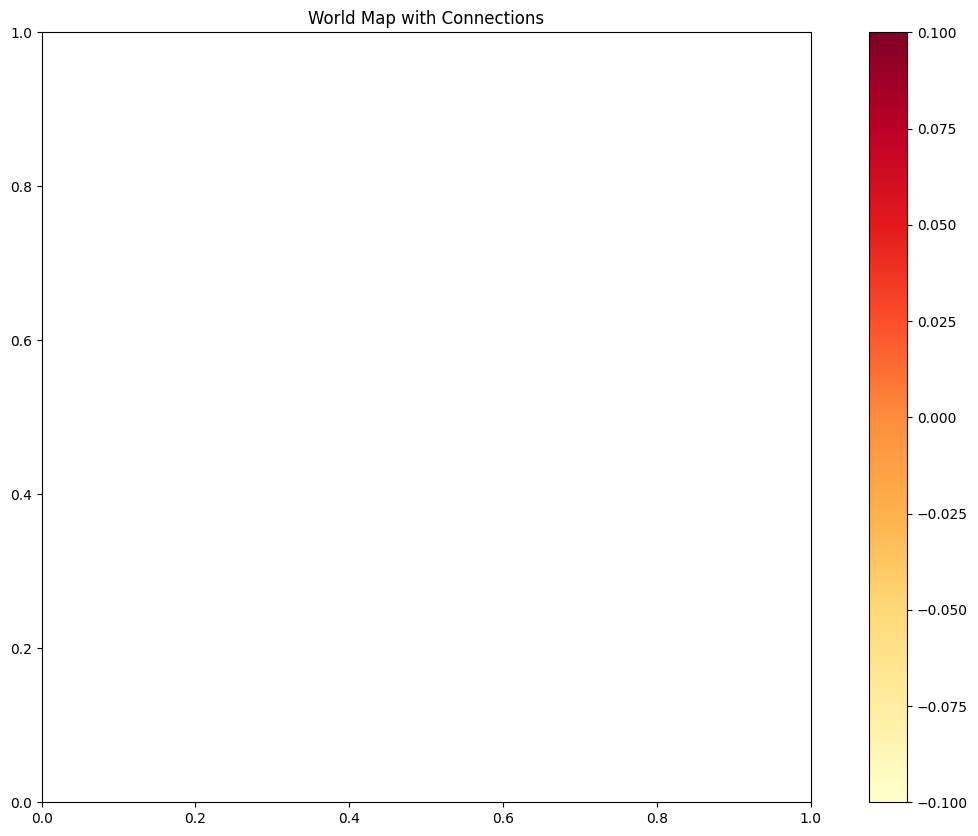

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("/home/dipp/Github/Master-Thesis-dipp/Geo_Map_Final/Data/Country_Data_V2_Latest.csv")
data['Connections'] = data['Connections'].astype(int)

# Read the built-in 'naturalearth_lowres' dataset for world country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the data with geometries based on the country code
merged = world.set_index('iso_a3').join(data.set_index('Country Code'))

# Create a figure and axis for the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map with connections as colors
merged.plot(column='Connections', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set a title for the map
ax.set_title('World Map with Connections')

# Save the map to an image file or display it
plt.savefig("world_map.png", dpi=300, bbox_inches='tight')
plt.show()
